In [1]:
# Columns in Data With Categorical Values- Must LabelEncode them
categorical_cols = ['hitpoint', 'outside.sideline', 'outside.baseline', 'same.side', 
                    'previous.hitpoint', 'server.is.impact.player', 'outcome', 'gender']

# Columns in the Data That Should Be Scaled
scaled_data = ['serve', 'rally', 'speed', 'net.clearance', 
               'distance.from.sideline', 'depth', 
               'player.distance.travelled', 
               'player.impact.depth', 
               'player.impact.distance.from.center', 
               'player.depth', 
               'player.distance.from.center', 
               'previous.speed', 'previous.net.clearance', 
               'previous.distance.from.sideline', 
               'previous.depth', 'opponent.depth', 
               'opponent.distance.from.center', 
               'previous.time.to.net']

In [2]:
import pandas as pd

train_data = pd.read_csv('tennis_data/mens_train_file (1).csv')
train_data.head()

,rally,serve,hitpoint,speed,net.clearance,distance.from.sideline,depth,outside.sideline,outside.baseline,player.distance.travelled,...,opponent.depth,opponent.distance.from.center,same.side,previous.hitpoint,previous.time.to.net,server.is.impact.player,id,train,outcome,gender
0,4,1,B,35.515042,-0.021725,3.474766,6.797621,False,False,1.467570,...,12.5628,2.0724,True,F,0.445318,False,5718,1,UE,mens
1,4,2,B,33.382640,1.114202,2.540801,2.608708,False,True,2.311931,...,12.3544,5.1124,False,B,0.432434,False,371,1,FE,mens
2,23,1,B,22.316690,-0.254046,3.533166,9.435749,False,False,3.903728,...,13.8620,1.6564,False,F,0.397538,True,7948,1,FE,mens
3,9,1,F,36.837309,0.766694,0.586885,3.342180,True,False,0.583745,...,14.2596,0.1606,True,B,0.671984,True,9312,1,UE,mens
4,4,1,B,35.544208,0.116162,0.918725,5.499119,False,False,2.333456,...,11.3658,1.1082,False,F,0.340411,False,7667,1,W,mens


In [3]:
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder

# Encode Categorical Data
def encode_data(data):
    d = defaultdict(LabelEncoder)
    data[categorical_cols] = data[categorical_cols].apply(lambda x: d[x.name].fit_transform(x))
    return data

encode_data(train_data).head()

,rally,serve,hitpoint,speed,net.clearance,distance.from.sideline,depth,outside.sideline,outside.baseline,player.distance.travelled,...,opponent.depth,opponent.distance.from.center,same.side,previous.hitpoint,previous.time.to.net,server.is.impact.player,id,train,outcome,gender
0,4,1,0,35.515042,-0.021725,3.474766,6.797621,0,0,1.467570,...,12.5628,2.0724,1,1,0.445318,0,5718,1,1,0
1,4,2,0,33.382640,1.114202,2.540801,2.608708,0,1,2.311931,...,12.3544,5.1124,0,0,0.432434,0,371,1,0,0
2,23,1,0,22.316690,-0.254046,3.533166,9.435749,0,0,3.903728,...,13.8620,1.6564,0,1,0.397538,1,7948,1,0,0
3,9,1,1,36.837309,0.766694,0.586885,3.342180,1,0,0.583745,...,14.2596,0.1606,1,0,0.671984,1,9312,1,1,0
4,4,1,0,35.544208,0.116162,0.918725,5.499119,0,0,2.333456,...,11.3658,1.1082,0,1,0.340411,0,7667,1,2,0


In [4]:
from sklearn.preprocessing import MinMaxScaler

# Scale Data
def scale_data(temp):
    scaler = MinMaxScaler()
    temp[scaled_data] = scaler.fit_transform(temp[scaled_data])
    return temp

scale_data(train_data).head()

,rally,serve,hitpoint,speed,net.clearance,distance.from.sideline,depth,outside.sideline,outside.baseline,player.distance.travelled,...,opponent.depth,opponent.distance.from.center,same.side,previous.hitpoint,previous.time.to.net,server.is.impact.player,id,train,outcome,gender
0,0.028571,0.0,0,0.547891,0.070686,0.212587,0.571902,0,0,0.101348,...,0.576272,0.159412,1,1,0.232917,0,5718,1,1,0
1,0.028571,1.0,0,0.509172,0.152916,0.155441,0.219463,0,1,0.159658,...,0.564726,0.393366,0,0,0.224725,0,371,1,0,0
2,0.571429,0.0,0,0.308242,0.053868,0.216160,0.793864,0,0,0.269584,...,0.648251,0.127397,0,1,0.202536,1,7948,1,0,0
3,0.171429,0.0,1,0.571900,0.127759,0.035887,0.281175,1,0,0.040312,...,0.670279,0.012283,1,0,0.377041,1,9312,1,1,0
4,0.028571,0.0,0,0.548420,0.080667,0.056191,0.462651,0,0,0.161144,...,0.509956,0.085209,0,1,0.166213,0,7667,1,2,0


In [5]:
from sklearn.model_selection import train_test_split
import numpy as np

train_data.drop('id', 1, inplace=True)   
train_data.drop('gender', 1, inplace=True)
train_data.drop('train', 1, inplace=True)

# Split into training and validation sets
train_mens, val_mens = train_test_split(train_data, 
                                        shuffle = True,
                                        test_size=0.2,
                                        random_state=42
                                        )


# Split data into input and outputs
X_train = train_mens.loc[:, train_mens.columns != 'outcome']
y_train = train_mens['outcome']
X_val = val_mens.loc[:, val_mens.columns != 'outcome']
y_val = val_mens['outcome']


# Reshape Data To Put Into NN
X_train_np = X_train.values.reshape(-1, 24)
y_train_np = y_train.reshape((-1,1))
X_val_np = X_val.values.reshape((-1, 24))

y_val_np = y_val.reshape((-1,1))
X_train_np, y_train_np, X_val_np, y_val_np

(array([[ 0.11428571,  0.        ,  1.        , ...,  0.        ,
          0.2059803 ,  1.        ],
        [ 0.08571429,  0.        ,  1.        , ...,  3.        ,
          0.3060522 ,  0.        ],
        [ 0.42857143,  0.        ,  1.        , ...,  0.        ,
          0.85330384,  0.        ],
        ..., 
        [ 0.2       ,  1.        ,  1.        , ...,  1.        ,
          0.25168967,  0.        ],
        [ 0.08571429,  0.        ,  0.        , ...,  0.        ,
          0.25955851,  0.        ],
        [ 0.05714286,  1.        ,  1.        , ...,  0.        ,
          0.38635705,  1.        ]]), array([[0],
        [2],
        [2],
        ..., 
        [0],
        [1],
        [2]]), array([[ 0.        ,  1.        ,  0.        , ...,  1.        ,
          0.17065277,  1.        ],
        [ 0.05714286,  0.        ,  1.        , ...,  3.        ,
          0.30766882,  1.        ],
        [ 0.14285714,  0.        ,  1.        , ...,  0.        ,
          

Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 1s 150us/step - loss: 1.0356 - acc: 0.4930 - val_loss: 0.9551 - val_acc: 0.5720
Epoch 2/50
4000/4000 [==============================] - 0s 63us/step - loss: 0.8607 - acc: 0.6208 - val_loss: 0.7804 - val_acc: 0.6480
Epoch 3/50
4000/4000 [==============================] - 0s 69us/step - loss: 0.7073 - acc: 0.6960 - val_loss: 0.6748 - val_acc: 0.7200
Epoch 4/50
4000/4000 [==============================] - 0s 60us/step - loss: 0.6200 - acc: 0.7475 - val_loss: 0.6164 - val_acc: 0.7270
Epoch 5/50
4000/4000 [==============================] - 0s 65us/step - loss: 0.5799 - acc: 0.7722 - val_loss: 0.5991 - val_acc: 0.7440
Epoch 6/50
4000/4000 [==============================] - 0s 68us/step - loss: 0.5538 - acc: 0.7853 - val_loss: 0.5697 - val_acc: 0.7580
Epoch 7/50
4000/4000 [==============================] - 0s 90us/step - loss: 0.5396 - acc: 0.7987 - val_loss: 0.5603 - val_acc: 0.7770
Epoch 

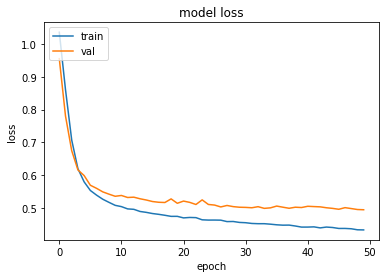

In [13]:
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout
from keras.optimizers import Adam
from sklearn.metrics import log_loss
import matplotlib.pyplot as  plt  

model = Sequential()
model.add(Dense(15, input_dim=24, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train_np, y_train_np, epochs=50, 
                    batch_size=32, 
                    validation_data=(X_val_np, y_val_np))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])  
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()